In [2]:
import tensorflow as tf

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Print the shapes to verify the data
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


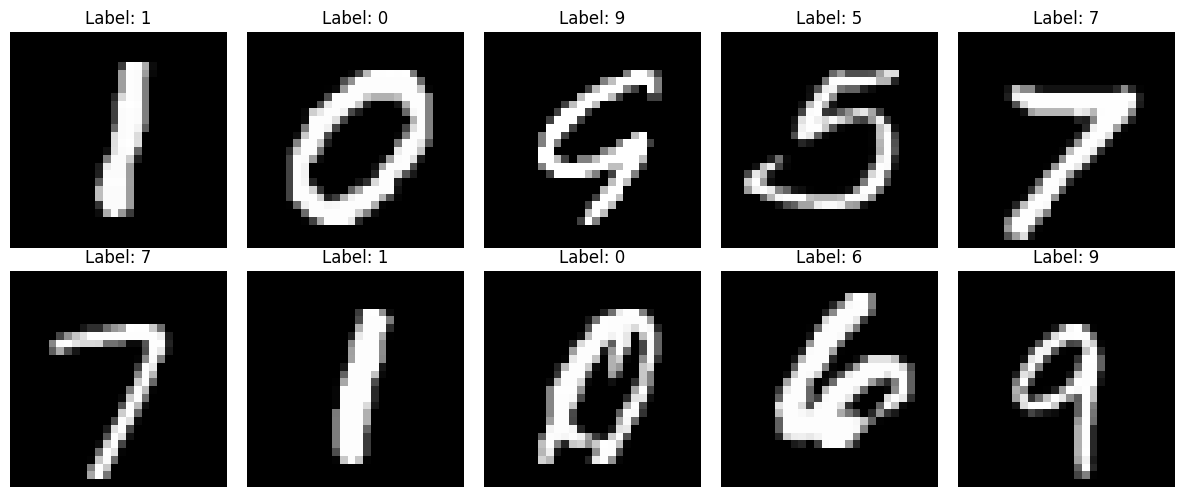

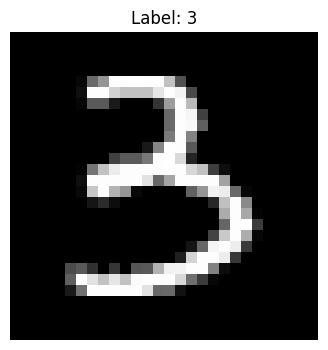

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with a grid of subplots
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()  # Flatten the 2x5 array to make indexing easier

# Plot 10 random images from the training set
for idx in range(10):
    # Choose a random image from the training set
    rand_idx = np.random.randint(0, len(x_train))
    
    # Display the image
    axes[idx].imshow(x_train[rand_idx], cmap='gray')
    axes[idx].axis('off')  # Hide the axes
    axes[idx].set_title(f'Label: {y_train[rand_idx]}')

plt.tight_layout()
plt.show()

def display_digit(image, label=None, prediction=None):
    """
    Display a single MNIST digit with optional label and prediction.
    
    Parameters:
    - image: 28x28 numpy array of the digit
    - label: Optional true label of the digit
    - prediction: Optional model prediction
    """
    plt.figure(figsize=(4, 4))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
    # Create title based on available information
    title = []
    if label is not None:
        title.append(f'Label: {label}')
    if prediction is not None:
        title.append(f'Prediction: {prediction}')
    
    plt.title('\n'.join(title))
    plt.show()

# Example usage:
# Display a single image from the training set
index = np.random.randint(0, len(x_train))
display_digit(x_train[index], y_train[index])

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]


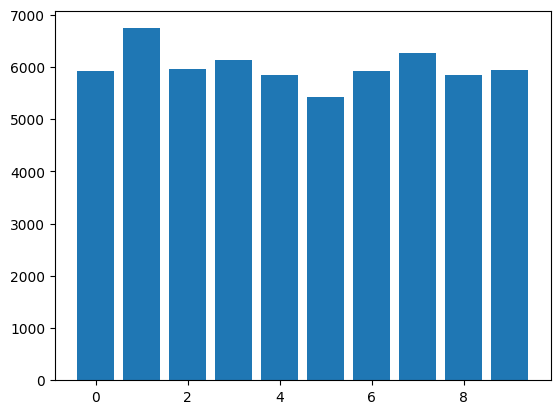

[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]


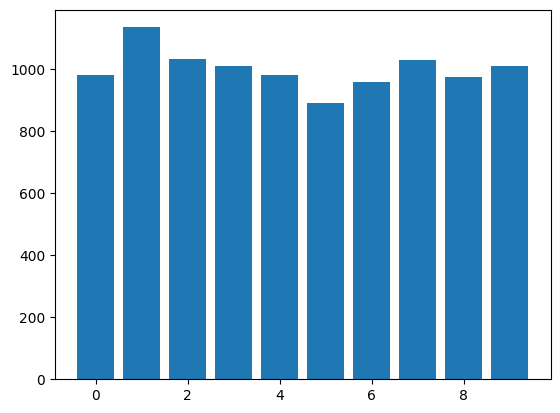

In [12]:
countarr = np.zeros(10)
for i in range(len(y_train)):
    countarr[y_train[i]] += 1
print(countarr)

plt.bar(range(10), countarr)
plt.show()

countarr = np.zeros(10)

for i in range(y_test.shape[0]):
    countarr[y_test[i]] += 1
print(countarr)

plt.bar(range(10), countarr)
plt.show()





In [13]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight('balanced', 
                                   classes=np.unique(y_train), 
                                   y=y_train)
class_weight_dict = dict(zip(range(10), class_weights))

print("Class weights:")
for digit, weight in class_weight_dict.items():
    print(f"Digit {digit}: {weight:.3f}")

# Later, when training your model:
# model.fit(..., class_weight=class_weight_dict)

Class weights:
Digit 0: 1.013
Digit 1: 0.890
Digit 2: 1.007
Digit 3: 0.979
Digit 4: 1.027
Digit 5: 1.107
Digit 6: 1.014
Digit 7: 0.958
Digit 8: 1.025
Digit 9: 1.009


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Reshape the data (flatten the 28x28 images to 784 features)
X_train_flat = x_train.reshape(x_train.shape[0], -1)
X_test_flat = x_test.reshape(x_test.shape[0], -1)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Try a simple kNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print(f"kNN Accuracy: {accuracy_score(y_test, y_pred):.4f}")

kNN Accuracy: 0.9452


In [21]:
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout

model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_test_scaled, y_test), class_weight=class_weight_dict)
results = model.evaluate(X_test_scaled, y_test)
print('loss: ', results[0])
print('accuracy: ', results[1])



Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8739 - loss: 0.4632 - val_accuracy: 0.9555 - val_loss: 0.1852
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9539 - loss: 0.1706 - val_accuracy: 0.9634 - val_loss: 0.1519
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9641 - loss: 0.1303 - val_accuracy: 0.9678 - val_loss: 0.1463
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9698 - loss: 0.1066 - val_accuracy: 0.9687 - val_loss: 0.1377
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9727 - loss: 0.0981 - val_accuracy: 0.9716 - val_loss: 0.1426
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.9649 - loss: 0.1840
loss:  0.14261920750141144
accuracy:  0.9715999960899353


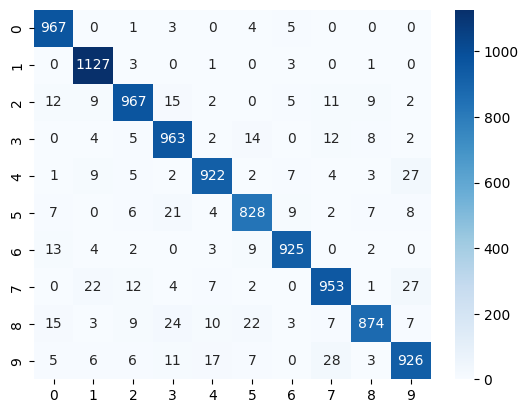

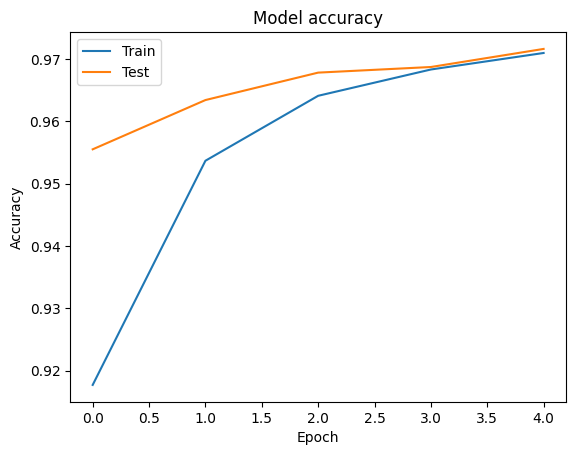

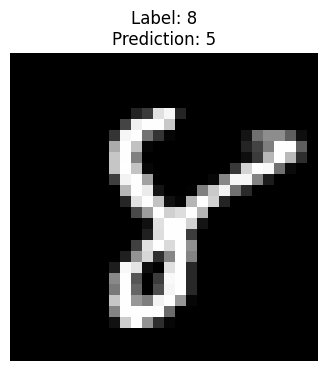

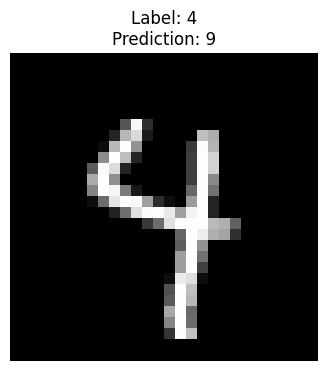

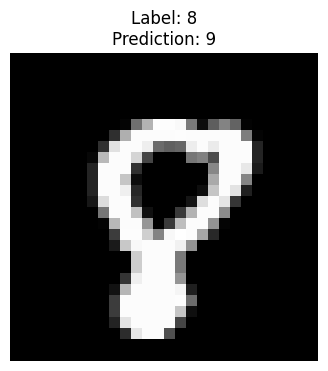

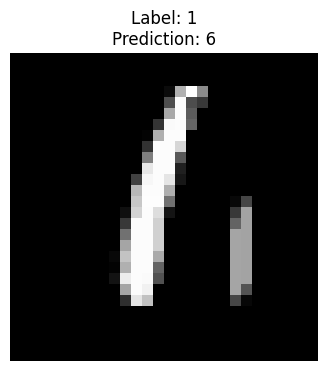

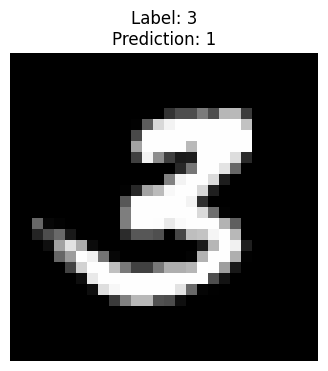

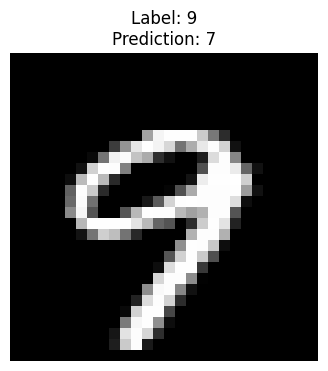

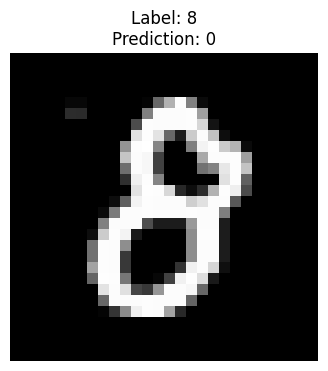

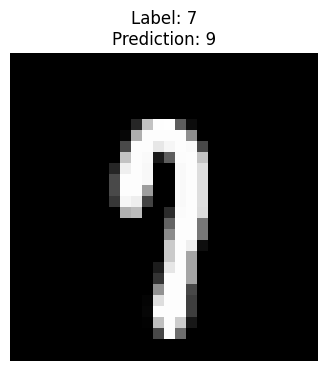

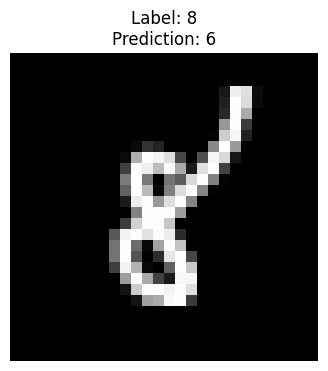

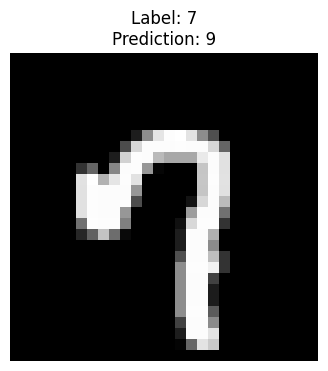

In [26]:
#plot the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

#plot the accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#print a few images that were misclassified
count = 0
start = np.random.randint(0, y_test.shape[0] - 1000) #start from a random point to avoid bias
for i in range(start, y_test.shape[0]):
    if y_test[i] != y_pred[i]:
        display_digit(x_test[i], y_test[i], y_pred[i])
        count += 1
    if count == 10:
        break





In [ ]:
#reshape the data
X_train_scaled = X_train_scaled.reshape(-1, 28, 28, 1)
X_test_scaled = X_test_scaled.reshape(-1, 28, 28, 1)

In [31]:
#small cnn
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

CPU_history = model.fit(X_train_scaled, y_train,
                   batch_size=128,
                   epochs=5, 
                   validation_data=(X_test_scaled, y_test),
                   class_weight=class_weight_dict)

results = model.evaluate(X_test_scaled, y_test)
print('loss: ', results[0])
print('accuracy: ', results[1])



Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8714 - loss: 0.4279 - val_accuracy: 0.9809 - val_loss: 0.0674
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9820 - loss: 0.0637 - val_accuracy: 0.9871 - val_loss: 0.0406
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9873 - loss: 0.0427 - val_accuracy: 0.9879 - val_loss: 0.0341
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9903 - loss: 0.0299 - val_accuracy: 0.9892 - val_loss: 0.0347
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9920 - loss: 0.0242 - val_accuracy: 0.9895 - val_loss: 0.0340
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9857 - loss: 0.0460
loss:  0.03398657590150833
accuracy:  0.9894999861717224


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



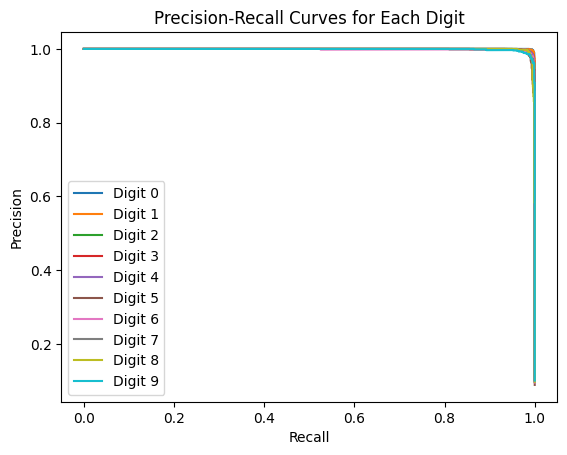

In [35]:
from sklearn.metrics import classification_report, precision_recall_curve

# Get predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print detailed metrics
print(classification_report(y_test, y_pred_classes))

# Plot precision-recall curves for each class
for i in range(10):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred[:, i])
    plt.plot(recall, precision, label=f'Digit {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Each Digit')
plt.legend()
plt.show()

In [37]:
from sklearn.model_selection import KFold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

cv_scores = []
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_scaled)):
    X_train_fold = X_train_scaled[train_idx]
    y_train_fold = y_train[train_idx]
    X_val_fold = X_train_scaled[val_idx]
    y_val_fold = y_train[val_idx]
    
    model.fit(X_train_fold, y_train_fold, 
              validation_data=(X_val_fold, y_val_fold),
              epochs=5, batch_size=128)
    
    score = model.evaluate(X_val_fold, y_val_fold)[1]
    cv_scores.append(score)
    print(f'Fold {fold + 1}: {score:.4f}')

print(f'Mean CV Score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9943 - loss: 0.0183 - val_accuracy: 0.9942 - val_loss: 0.0188
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9952 - loss: 0.0157 - val_accuracy: 0.9938 - val_loss: 0.0192
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9958 - loss: 0.0136 - val_accuracy: 0.9923 - val_loss: 0.0240
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9957 - loss: 0.0136 - val_accuracy: 0.9932 - val_loss: 0.0218
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9968 - loss: 0.0090 - val_accuracy: 0.9942 - val_loss: 0.0194
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9944 - loss: 0.0192
Fold 1: 0.9942
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9961 - loss: 0.0135 - val_accuracy: 0.9959 - val_loss: 0.0101
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9974 - loss: 0.0094 - val_accuracy: 0.9979 - val_loss: 0.0063
Epoch 3/5
375/

In [38]:
from sklearn.model_selection import KFold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

cv_scores = []
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_scaled)):
    X_train_fold = X_train_scaled[train_idx]
    y_train_fold = y_train[train_idx]
    X_val_fold = X_train_scaled[val_idx]
    y_val_fold = y_train[val_idx]
    
    model.fit(X_train_fold, y_train_fold, 
              validation_data=(X_val_fold, y_val_fold),
              epochs=5, batch_size=128)
    
    score = model.evaluate(X_val_fold, y_val_fold)[1]
    cv_scores.append(score)
    print(f'Fold {fold + 1}: {score:.4f}')

print(f'Mean CV Score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9993 - loss: 0.0026 - val_accuracy: 0.9993 - val_loss: 0.0017
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9987 - loss: 0.0034 - val_accuracy: 0.9998 - val_loss: 6.6299e-04
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9986 - loss: 0.0047 - val_accuracy: 0.9985 - val_loss: 0.0038
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9981 - loss: 0.0112 - val_accuracy: 0.9990 - val_loss: 0.0024
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9987 - loss: 0.0036 - val_accuracy: 0.9996 - val_loss: 0.0013
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9996 - loss: 0.0012
Fold 1: 0.9996
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9989 - loss: 0.0031 - val_accuracy: 0.9998 - val_loss: 4.0029e-04
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9987 - loss: 0.0044 - val_accuracy: 0.9992 - val_loss: 0.0023
Epoch 

In [40]:
import pandas as pd
results_df = pd.DataFrame({
    'Model': ['kNN', 'Dense NN', 'CNN'],
    'Accuracy': [0.9452, 0.9716, 0.9895],
    'Training Time': ['Fast', 'Medium', 'Slow'],
    'Inference Time': ['Slow', 'Fast', 'Medium']
})
print(results_df)

      Model  Accuracy Training Time Inference Time
0       kNN    0.9452          Fast           Slow
1  Dense NN    0.9716        Medium           Fast
2       CNN    0.9895          Slow         Medium


In [41]:
#small cnn
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

class SmallCNN(nn.Module):
    def __init__(self):
        super(SmallCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool = nn.MaxPool2d(2)
        self.dropout = nn.Dropout(0.2)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 5 * 5)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled).reshape(-1, 1, 28, 28)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test_scaled).reshape(-1, 1, 28, 28)
y_test_tensor = torch.LongTensor(y_test)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=128)

# Initialize model, loss and optimizer
device = torch.device('cpu')
model = SmallCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Training loop
for epoch in range(5):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    # Validation
    model.eval()
    correct = 0
    total = 0
    test_loss = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print(f'Epoch {epoch + 1}:')
    print(f'Training loss: {running_loss/len(train_loader):.4f}')
    print(f'Test loss: {test_loss/len(test_loader):.4f}')
    print(f'Test accuracy: {100 * correct / total:.2f}%\n')

# Final evaluation
model.eval()
correct = 0
total = 0
test_loss = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Final results:')
print('loss: ', test_loss/len(test_loader))
print('accuracy: ', correct/total)


Epoch 1:
Training loss: 0.1975
Test loss: 0.0555
Test accuracy: 98.14%

Epoch 2:
Training loss: 0.0576
Test loss: 0.0381
Test accuracy: 98.73%

Epoch 3:
Training loss: 0.0409
Test loss: 0.0305
Test accuracy: 98.99%

Epoch 4:
Training loss: 0.0323
Test loss: 0.0297
Test accuracy: 98.88%

Epoch 5:
Training loss: 0.0253
Test loss: 0.0283
Test accuracy: 99.08%

Final results:
loss:  0.02830160582368391
accuracy:  0.9908
